# Relationships between Factors & State Transition Learning

- view distributions of computational parameters of interest -- Mb beta & state transition learning rate

state transition LR mean: 0.14708544515215852, sd: 0.04395799110499197
mean MB agnostic score: 59.276008492569005, sd: 11.28879586238385
low MB performers compulsivity scores: []
mean low comp: nan, mean high comp: nan
mean: -1.005722202066667e-17, sd: 0.999646080328678 of compulsivity full sample
mean: -1.005722202066667e-17, sd: 0.999646080328678 of compulsivity reduced sample
difference in compulsivity before after t: 0.0, p:1.0
B-MF median: 1.8388
B-MF mean: 2.2843324062278842
      Unnamed: 0                            subj  age          iq  gender  \
0              1  304SM51WA34XCM4E67SL28LY2UCBS4   22   85.742035      -1   
1              2  308Q0PEVB8DPUFML3BKB70KL51T9IW   27  115.266850       1   
2              3  308Q0PEVB8DPUFML3BKB70KL6Q8I9Z   30   93.811195       1   
3              4  308XBLVESI4LB741RISGCYG2G16RBR   25  108.106105       1   
4              5  30BUDKLTXDVUDNIN42H3A5HRS51E5M   33   95.588980      -1   
...          ...                             ...  ..

/home/paul/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/paul/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


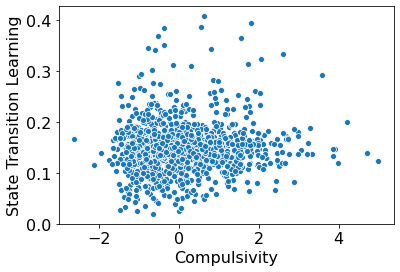

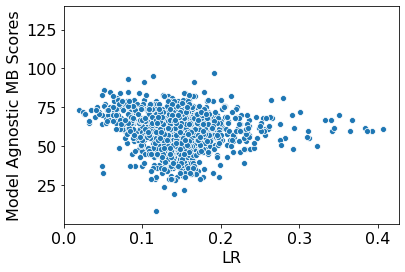

normality test: 0.9105814695358276 , p-val: 4.875811358587056e-28


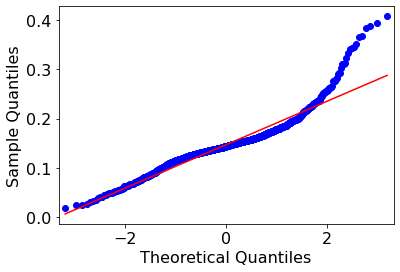

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import shapiro
from scipy.stats import ttest_ind as tt
from scipy.stats import spearmanr as corrp
import numpy as np
from statsmodels.graphics.gofplots import qqplot

font = {'family' : 'sans-serif',
        'weight' : 'light',
        'size'   : 16}

matplotlib.rc('font', **font)
bad_indices=[]
sr_data=pd.read_csv('self_report_study2.csv') #load self-report data
mb_agnostic=pd.read_csv('mb_scores.csv')
mb_scores=mb_agnostic['MB_behav']
state_t=pd.read_csv('Gillan_TL_full_lrT_C.csv',header=None) #load state transition lrs
it_mb=pd.read_csv('Gillan_TL_full_MB_C.csv',header=None) #load MB beta
mf1=pd.read_csv('Gillan_TL_full_MF1_C.csv',header=None)
ratio_mfmb=mf1/it_mb
print('state transition LR mean: {}, sd: {}'.format(np.mean(state_t[0]),np.std(state_t[0])))
f2_low_lr=[]
f2_high_lr=[]
sr_data_r=sr_data
fac1=sr_data_r['Factor1']
fac2=sr_data_r['Factor2']
fac3=sr_data_r['Factor3']
print('mean MB agnostic score: {}, sd: {}'.format(np.mean(mb_scores),np.std(mb_scores)))
bad_rows=[]
low_mb=[]
# for i in range(len(fac2)):
#     if (it_mb[0][i]<3.0) :
#         bad_rows.append(i)

#     elif (mb_scores[i]<15):
#         low_mb.append(fac2[i])
#         bad_rows.append(i)
#     else:

#         if fac2[i]>=1.0:
#                 f2_high_lr.append(state_t[0][i])
#         elif fac2[i]<=1.0:
#                 f2_low_lr.append(state_t[0][i])
        
#     if state_t[0][i]>0.5:
#         bad_rows.append(i)
  
print('low MB performers compulsivity scores: {}'.format(low_mb))
print('mean low comp: {}, mean high comp: {}'.format(np.median(f2_low_lr),np.median(f2_high_lr)))

# print(np.mode(it_mb[0]))
state_t = state_t.drop(labels=bad_rows)
state_t = state_t.reset_index(drop=True)
it_mb = it_mb.drop(labels=bad_rows)
it_mb = it_mb.reset_index(drop=True)
mb_scores = mb_scores.drop(labels=bad_rows)
mb_scores = mb_scores.reset_index(drop=True)

fac2r=fac2.drop(labels=bad_rows)
fac2r = fac2r.reset_index(drop=True)
print('mean: {}, sd: {} of compulsivity full sample'.format(np.mean(fac2),np.std(fac2)))
print('mean: {}, sd: {} of compulsivity reduced sample'.format(np.mean(fac2r),np.std(fac2r)))

t,p=tt(fac2,fac2r,equal_var=False)
print('difference in compulsivity before after t: {}, p:{}'.format(t,p))

# stop

ratio_mfmb=ratio_mfmb.drop(labels=bad_rows)
mf1=mf1.drop(labels=bad_rows)
mf1 = mf1.reset_index(drop=True)
print('B-MF median: {}'.format(np.median(mf1)))
print('B-MF mean: {}'.format(np.mean(mf1[0])))

fac1=fac1.drop(labels=bad_rows)
fac3=fac3.drop(labels=bad_rows)
sr_data= sr_data.drop(labels=bad_rows)
sr_data = sr_data.reset_index(drop=True)
print(sr_data)

# print('mean: {}, sd: {} of compulsivity small sample'.format(np.mean(fac2_r),np.std(fac2_r)))
r,p=corrp(mb_scores,state_t[0])
print('mb scores and state_t: {}, pval: {}'.format(r,p))


lrt_r=state_t
corr_fac1=sr_data_r['Factor1'].corr(np.log(lrt_r[0]))
print(corr_fac1)
iq=sr_data_r['iq']
corr_fac2=sr_data_r['Factor2'].corr(np.log(lrt_r[0]))
print(corr_fac2)
corr_fac3=sr_data_r['Factor3'].corr(np.log(lrt_r[0]))
print(corr_fac3)


sns.scatterplot(x=fac2r,y=state_t[0])
plt.ylabel('State Transition Learning')
plt.xlabel('Compulsivity')
plt.show()
sns.scatterplot(x=state_t[0],y=mb_scores)
plt.ylabel('Model Agnostic MB Scores')
plt.xlabel('LR')
plt.ylim(0.01,140)
plt.show()
stat,p=shapiro(lrt_r[0])
print("normality test: {} , p-val: {}".format(stat,p))
# q-q plot
qqplot(lrt_r[0], line='s')
plt.show()


# Build design matrix to predict compulsivity factor

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x=np.asarray(state_t)
xp = polynomial_features.fit_transform(x)

#build design matrix
print('Lrate Predicts Compulsivity')
X = sr_data[['iq','gender','age']]
# X=pd.DataFrame()
X['lrate_transition']=state_t[0]
X = sm.add_constant(X)
y=fac2r
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())
print('')
print('')
print('Lrate Predicts beta MB')
X = sr_data[['iq','gender','age']]
# X=pd.DataFrame()
X['lrate_transition']=state_t[0]
X = sm.add_constant(X)
y=it_mb[0]
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())
print('')
print('')
print('beta MB predicts compulsivity')
X = sr_data[['iq','gender','age']]
# X=pd.DataFrame()
X['beta MB']=it_mb[0]
X = sm.add_constant(X)
y=fac2r
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())
print('')
print('')
print('beta_mb mediates effect of state LR on compulsivity')
X = sr_data[['iq','gender','age']]
# X=pd.DataFrame()
X['lrate_transition']=state_t[0]
X['beta_MB']=it_mb[0]
X = sm.add_constant(X)
y=fac2r
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())



# X['compulsivity']=fac2r #compulsivity factor defined above
# X['interaction_c_tl']=fac2r*state_t[0]
# X['Beta MB']=it_mb[0]
# X['interaction_c_mb']=fac2r*it_mb[0]
# X['interaction_c_mb_tl']=fac2r*it_mb[0]*state_t[0]


# X=sm.add_constant(X)

# y=it_mb[0]
# corrmat=X.corr(method='spearman')
# print(corrmat)


Lrate Predicts Compulsivity
                            OLS Regression Results                            
Dep. Variable:                Factor2   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     32.16
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           1.12e-25
Time:                        23:38:37   Log-Likelihood:                -1942.7
No. Observations:                1413   AIC:                             3895.
Df Residuals:                    1408   BIC:                             3922.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const       

<ipython-input-2-fef7e5cea432>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lrate_transition']=state_t[0]
<ipython-input-2-fef7e5cea432>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['lrate_transition']=state_t[0]
<ipython-input-2-fef7e5cea432>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

# Fit linear regression

                            OLS Regression Results                            
Dep. Variable:                Factor2   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     7.175
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           1.53e-05
Time:                        12:02:55   Log-Likelihood:                -428.75
No. Observations:                 322   AIC:                             867.5
Df Residuals:                     317   BIC:                             886.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0836      0.593  

# Fit models in CV procedure

In [28]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

Xt = X.values
print(len(Xt))
# print(len(Xt[0]))
# for i in Xt:
#     for j in i:
#         print(j+1)


# stop
y = y

RMSE1=0
rs1=0
RMSE2=0
rs2=0
splits=5
kf = KFold(n_splits=splits)
kf.get_n_splits(Xt)
for train_index, test_index in kf.split(Xt):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = Xt[train_index], Xt[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#     print(X_train[:])
#     print(np.all(np.isfinite(X_train)))
#     print(np.any(np.isnan(X_train)))
#     print(np.any(np.isnan(X_test)))
#     print(np.all(np.isfinite(X_test)))
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2=model.predict(X_test)
    RMSE2+=np.sqrt(mean_squared_error(y_test,r2)) 
    rs2+=model.score(X_test,y_test)
print('Average RMSE Lin Reg: {}'.format(RMSE2/splits))
print(rs2/splits)



412
Average RMSE Lin Reg: 0.9281272315253226
0.03934571040620314


In [29]:
np.mean(it_mb[0])

4.724766990291262

- LR first: .07438 
- Beta MB first: .07783  
- After both: .0812

Beta MB adds: 0.0068 to variance explained
LR adds: .0034

In [215]:
# change in R^2 F-test
print(.0593-.0576)
(.0593-.0550)/((1-.055)/390)

0.0017000000000000001


1.774603174603174

# Model Comparison Results

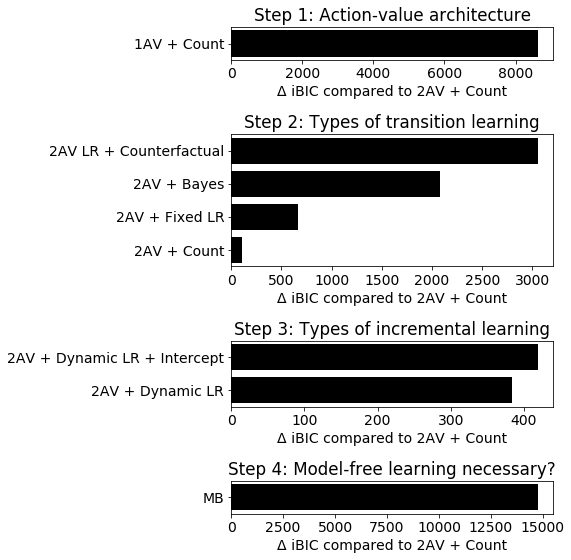

In [3]:
from brokenaxes import brokenaxes
import matplotlib

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)

f, axs = plt.subplots(4, 1,figsize=(8,8),gridspec_kw={'height_ratios':[10,40,20,10]},sharex=False)

Daw_TL=559888.84
winning=551159.30
models=['1AV + Count']
BIC=[559782.04-winning]
ax1 = sns.barplot(x=BIC, y=models,
                color='k',ax=axs[0])
ax1.set(title='Step 1: Action-value architecture', ylabel="",
       xlabel="\u0394 iBIC compared to 2AV + Count")

winning=550744.26 # MC Winning

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
models=['2AV LR + Counterfactual','2AV + Bayes','2AV + Fixed LR','2AV + Count']
BIC=[553994.95-winning,553025.44-winning,551612.23-winning,551055.30-winning,]
ax1 = sns.barplot(x=BIC, y=models,
                 color='k',ax=axs[1])
ax1.set(title='Step 2: Types of transition learning', ylabel="",
       xlabel="\u0394 iBIC compared to 2AV + Count")

models=['2AV + Dynamic LR + Intercept','2AV + Dynamic LR']
BIC=[551361.71-winning,551327.21-winning]
ax1 = sns.barplot(x=BIC, y=models,color='k',ax=axs[2])

ax1.set(title='Step 3: Types of incremental learning', ylabel="",
       xlabel="\u0394 iBIC compared to 2AV + Count")
models=['MB',]
BIC=[565698.33-winning]
ax1 = sns.barplot(x=BIC, y=models,color='k',ax=axs[3])
ax1.set(title='Step 4: Model-free learning necessary?', ylabel="",
       xlabel="\u0394 iBIC compared to 2AV + Count")
plt.tight_layout()

plt.savefig('high_res_model_comparison_final.png', dpi=300)